#  <center> Speech Emotion Recognition - SER <center>


The final accuracy is around 96%.

# Importing library

In [1]:
! apt-get update
! apt-get install -y libsndfile-dev

Get:1 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease [5004 B]
Get:2 http://packages.cloud.google.com/apt cloud-sdk-bionic InRelease [6396 B]
Get:3 http://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Get:4 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1581 B]
Err:1 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY B53DC80D13EDEF05
Err:2 http://packages.cloud.google.com/apt cloud-sdk-bionic InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY B53DC80D13EDEF05
Err:3 http://packages.cloud.google.com/apt cloud-sdk InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY B53DC80D13EDEF05
Ign:5 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://develop

In [2]:
import pandas as pd
import numpy as np

import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
# you can add the data by clicking the "Add Data" button on the right
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"
Berlin = "/kaggle/input/berlin-database-of-emotional-speech-emodb/"
urdu = "../input/urdu-language-speech-dataset/"
emovo = '../input/emovo-italian-ser-dataset/EMOVO'

##  <center> 1. Ravdess Dataframe <center>
    


In [5]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)


Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head(10)
print(Ravdess_df.shape)
Ravdess_df.Emotions.value_counts()

(1440, 2)


neutral     288
happy       192
sad         192
angry       192
disgust     192
fear        192
surprise    192
Name: Emotions, dtype: int64

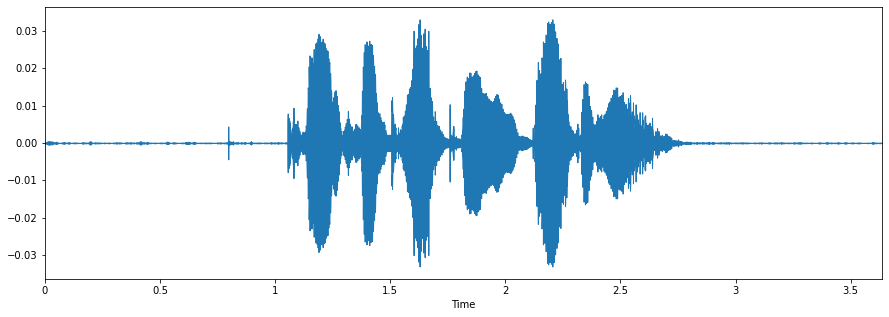

In [6]:

#Ravdess
fname = '../input/ravdess-emotional-speech-audio/Actor_08/03-01-01-01-01-02-08.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# File audio
Audio(fname)

## <center>2. Crema DataFrame</center>


In [7]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe cho cãm xúc
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe cho đường dẫn
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.shape)
Crema_df.Emotions.value_counts()

(7442, 2)


sad        1271
happy      1271
angry      1271
fear       1271
disgust    1271
neutral    1087
Name: Emotions, dtype: int64

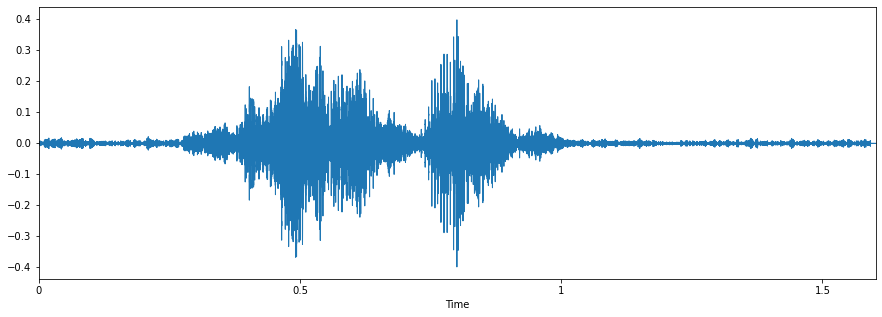

In [8]:
# use the well known Librosa library for this task 
#Crema
fname = Crema+'1001_IEO_FEA_MD.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
Audio(fname)

##  <center> 3. TESS dataset <center>

In [9]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.shape)
Tess_df.Emotions.value_counts()

(2800, 2)


neutral     400
sad         400
fear        400
surprise    400
happy       400
angry       400
disgust     400
Name: Emotions, dtype: int64

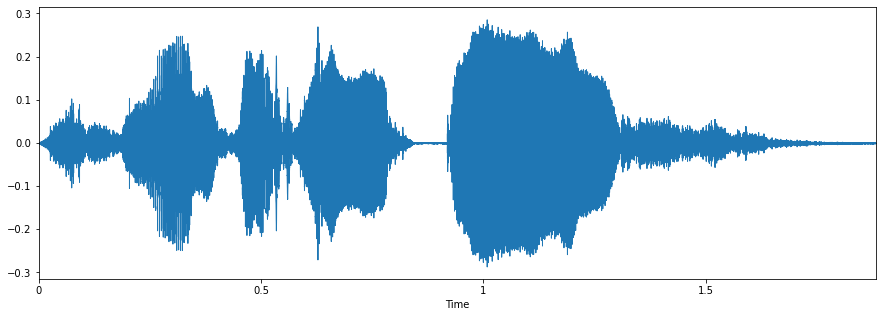

In [10]:

fname = '../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_base_fear.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

Audio(fname)

##  <center> 4. Savee dataset <center>


In [11]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.shape)
Savee_df.Emotions.value_counts()

(480, 2)


neutral     120
happy        60
fear         60
surprise     60
angry        60
sad          60
disgust      60
Name: Emotions, dtype: int64

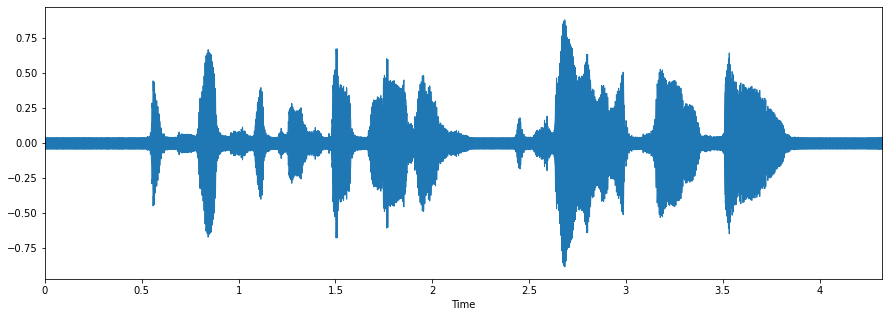

In [12]:

fname = Savee + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)


Audio(fname)

## <center> 6. Urdu Language Speech Dataset <center>
https://www.kaggle.com/datasets/bitlord/urdu-language-speech-dataset

In [13]:
#urdu = "../input/urdu-language-speech-dataset/"
urdu_directory_list = os.listdir(urdu)

file_emotion = []
file_path = []
i = 0

# lan = 'ur-In'
for dir in urdu_directory_list:
    if dir == 'README.md':
        pass
    else:
        directories = os.listdir(urdu + dir)
        for file in directories:
            file_path.append(urdu + dir + '/' + file)
            file_emotion.append(dir.lower())
      #      i+=1
      #      print(str(i) + ':' + dir + '/' + file + '-' + dir.lower())
            

# dataframe for path of files.

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Urdu_df = pd.concat([emotion_df, path_df], axis=1)
Urdu_df.head()
print(Urdu_df.shape)
Urdu_df.Emotions.value_counts()

(400, 2)


happy      100
angry      100
neutral    100
sad        100
Name: Emotions, dtype: int64

In [14]:
sum(Urdu_df['Path'].isnull())

0

## <center> 7.EMOVO - Italian SER Dataset <center>
https://www.kaggle.com/datasets/sourabhy/emovo-italian-ser-dataset
    
dis - disgusto (Disgust) <br />
pau - paura (Fear)<br />
rab - Rabbia (Anger)<br />
gio - gioia (Joy/Happy)<br />
sor - Sorpresa (Surprise)<br />
tri - triste (Sad)<br />
neu - neutro (Neutral)

In [15]:
# emovo = '../input/emovo-italian-ser-dataset/EMOVO'
# lan = 'it-IT'

file_emotion = []
file_path = []

for sub_directory in os.listdir(emovo):
    direc = os.path.join(emovo,sub_directory)
    if sub_directory == 'documents':
        pass
    else:
        for file in os.listdir(direc):
            emotion = file.split('-')[0]
            file_path.append(os.path.join(direc,file))
            file_emotion.append(emotion)

            # dataframe for path of files.
#Features['labels'] = Features['labels'].replace(['disgust', 'sad', 'fear', 'angry', 'happy', 'neutral', 'surprise'], [0,1,2,3,4,5,6])

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Emovo_df = pd.concat([emotion_df, path_df], axis=1)
Emovo_df.Emotions.replace({ 'neu':'neutral', 'gio':'happy', 'tri':'sad', 'rab':'angry', 'pau':'fear', 'dis':'disgust', 'sor':'surprise'}, inplace=True)

Emovo_df.head()  
print(Emovo_df.shape)
Emovo_df.Emotions.value_counts()

(588, 2)


happy       84
fear        84
surprise    84
angry       84
neutral     84
sad         84
disgust     84
Name: Emotions, dtype: int64

## <center> 5. EmoDB Dataset <center>

Code of emotions:

| letter | emotion (english) | letter | emotion (german) |
| ------ | ---------------- | ------ | ----------------- |
| A      | anger            | W      | Ärger (Wut)        |
| B      | boredom          | L      | Langeweile         |
| D      | disgust          | E      | Ekel               |
| F      | anxiety/fear     | A      | Angst              |
| H      | happiness        | F      | Freude             |
| S      | sadness          | T      | Trauer             |

N = neutral version

In [16]:
Berlin = "/kaggle/input/berlin-database-of-emotional-speech-emodb/wav/"
berlin_directory_list = os.listdir(Berlin)

file_emotion = []
file_path = []

for file in berlin_directory_list:
    file_path.append(Berlin + file)
    
    ele = file[5]
    if ele=='W':
        file_emotion.append('angry')
    elif ele=='E':
        file_emotion.append('disgust')
    elif ele=='A':
        file_emotion.append('fear')
    elif ele=='F':
        file_emotion.append('happy')
    elif ele=='N':
        file_emotion.append('neutral')
    elif ele=='L'or ele=='T':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Berlin_df = pd.concat([emotion_df, path_df], axis=1)
print(Berlin_df.shape)
Berlin_df.head(10)
Berlin_df.Emotions.value_counts()

(535, 2)


sad        143
angry      127
neutral     79
happy       71
fear        69
disgust     46
Name: Emotions, dtype: int64

### Data_path


In [17]:

data_path = pd.concat([Ravdess_df, Tess_df, Savee_df, Crema_df, Emovo_df, Urdu_df, Berlin_df], axis = 0)
#data_path.to_csv("data_path.csv",index=False)
data_path.head()
data_path.Emotions.value_counts()

sad         2250
angry       2234
happy       2178
neutral     2158
fear        2076
disgust     2053
surprise     736
Name: Emotions, dtype: int64

In [18]:
sum(data_path['Path'].isnull())
#Emovo_df.head()

0

## Plots

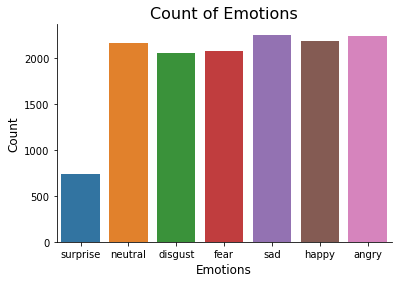

In [19]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()



* Waveplots
* Spectograms
* MFCC 

In [20]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Dạng sóng cho âm thanh ở cảm xúc {}'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft thực hiện biến đổi Fourier.
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram cho âm thanh với cảm xúc {}'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    
def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient cho âm thanh với cảm xúc {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

In [21]:
def create_freq_plot(data, sr):
    fft_data = np.fft.fft(data)

    # 计算频率轴
    freq_axis = np.linspace(0, sr, len(fft_data))

    # 绘制频域图
    plt.plot(freq_axis[:len(fft_data)//2], np.abs(fft_data[:len(fft_data)//2]))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()

In [22]:
# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)
#RMS Energy
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
#MFCC
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [23]:
fname = Savee + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname, duration=2.5, offset=0.6)
print("ZCR: ", zcr(data).shape)
print("RMS :", rmse(data).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)

ZCR:  (108,)
RMS : (108,)
MFCC:  (2160,)


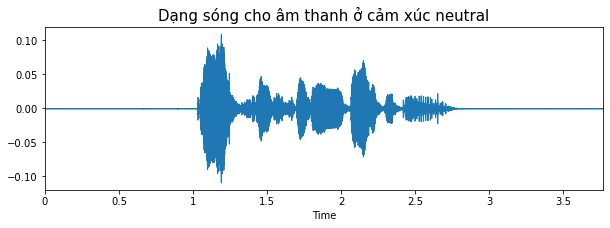

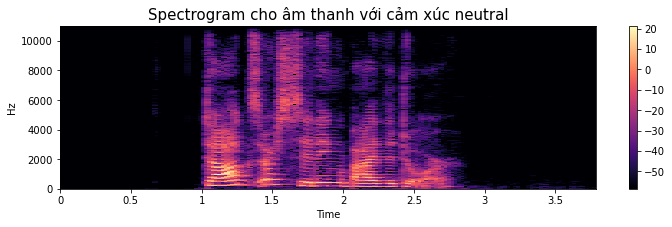

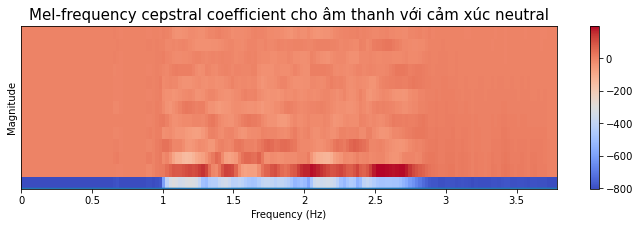

In [24]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
create_freq_plot(data, sampling_rate)
#Audio(path)

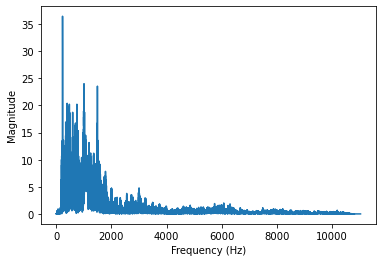

In [25]:
create_freq_plot(data, sampling_rate)

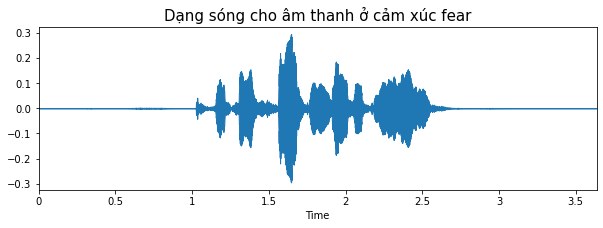

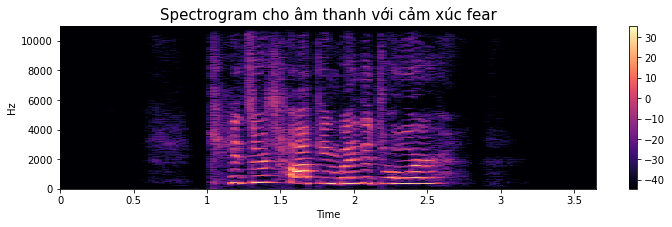

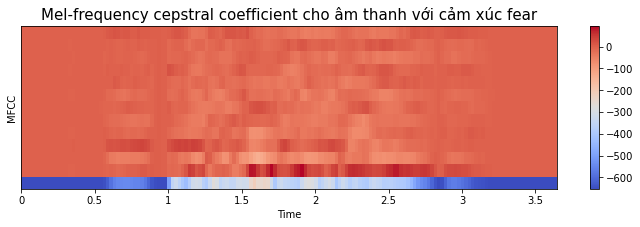

In [26]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

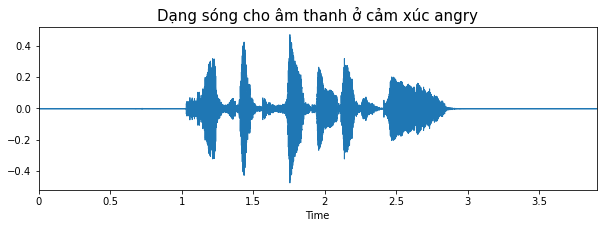

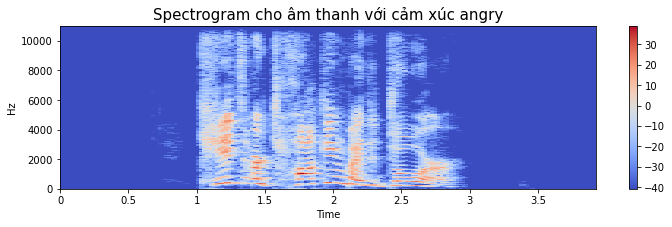

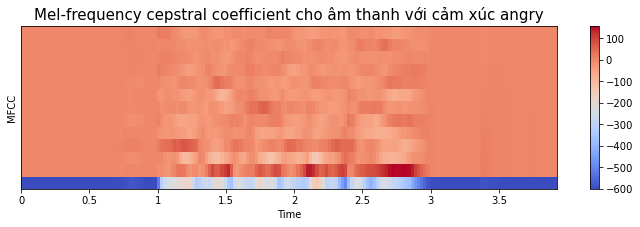

In [27]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

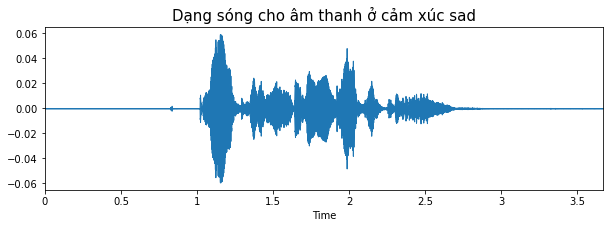

22050


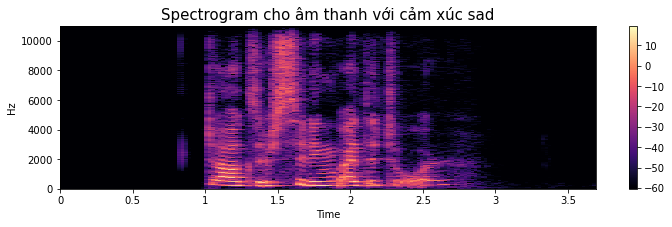

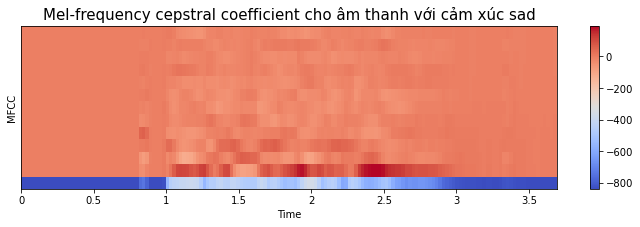

In [28]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)

print(sampling_rate)
Audio(path)

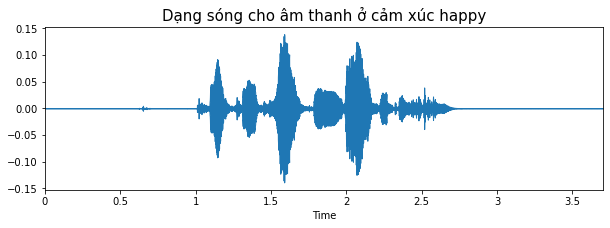

22050


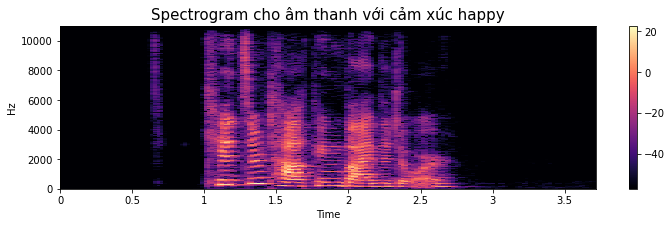

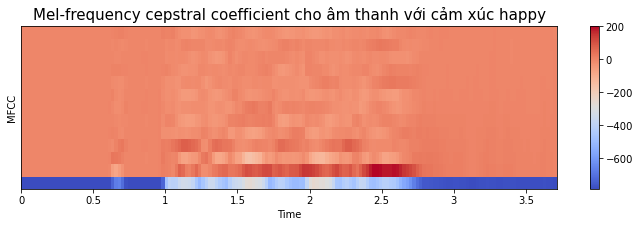

In [29]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
print(sampling_rate)
Audio(path)

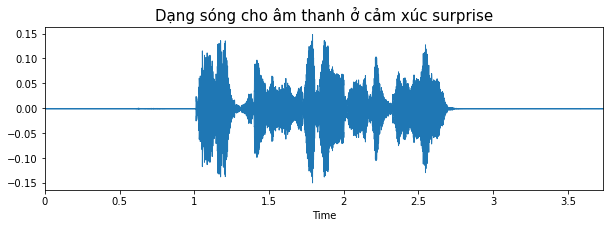

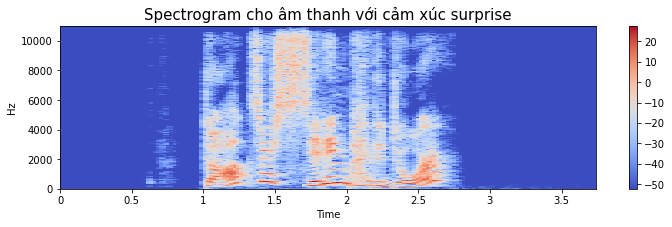

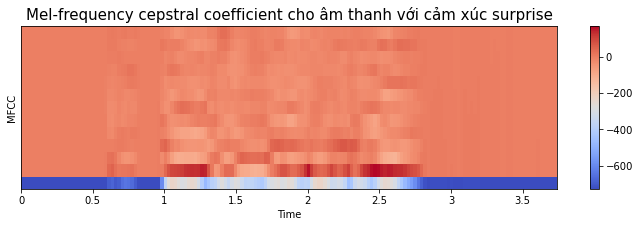

In [30]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

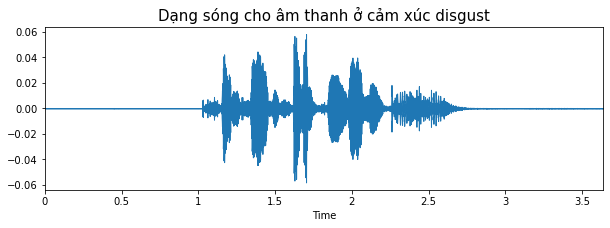

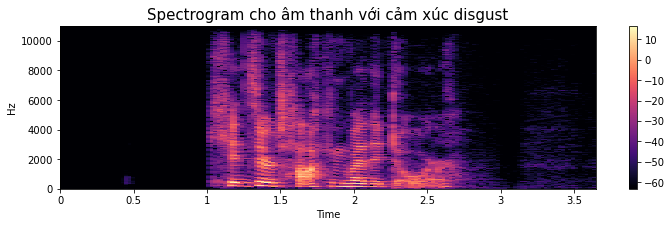

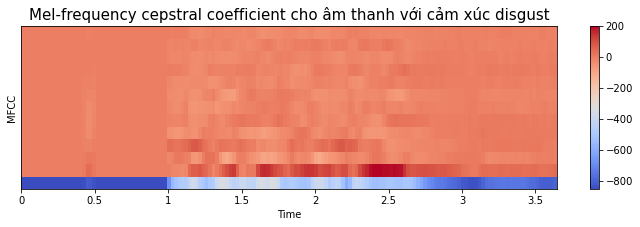

In [31]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data,sampling_rate,emotion)
Audio(path)

## Data Augmentation

- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
- In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.


In [32]:
def noise(data,noise_rate=0.01):
    noise_amp = 0.01*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# Lấy một ví dụ ra làm mẫu
path = np.array(data_path.Path)[2]
data, sample_rate = librosa.load(path, duration = 2.5, offset = 0.6)
data, sample_rate = librosa.load(path, sr = None, duration = 2.5, offset = 0.6)

#### 1. Pure audio clip

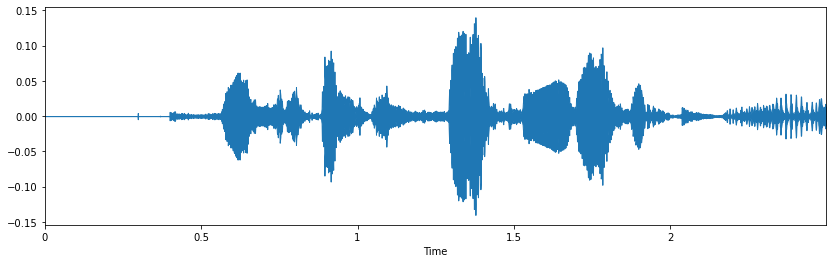

In [33]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

#### 2. Add more noise

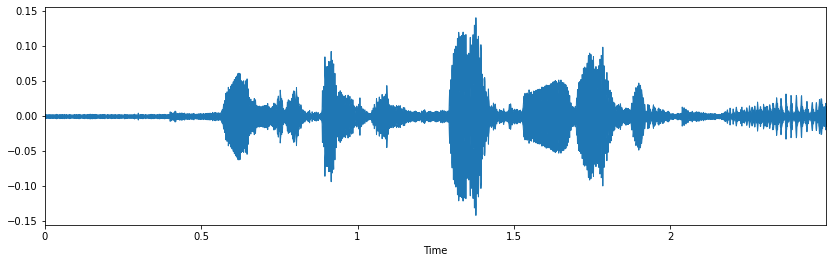

In [34]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 3. Stretching

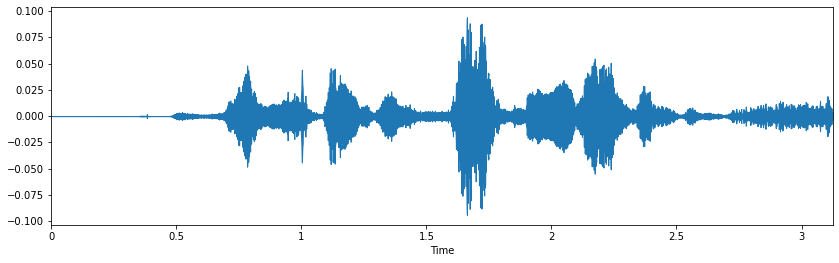

In [35]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 4. Shifting

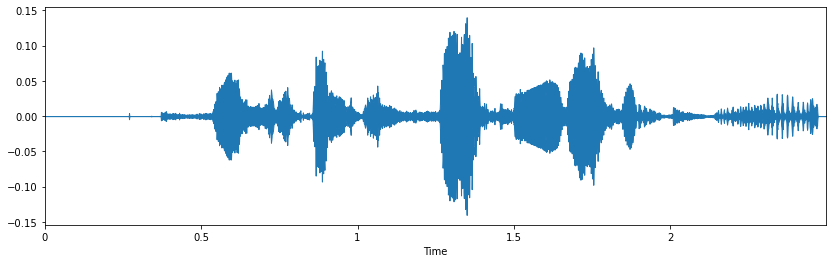

In [36]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


#### 5. Pitch

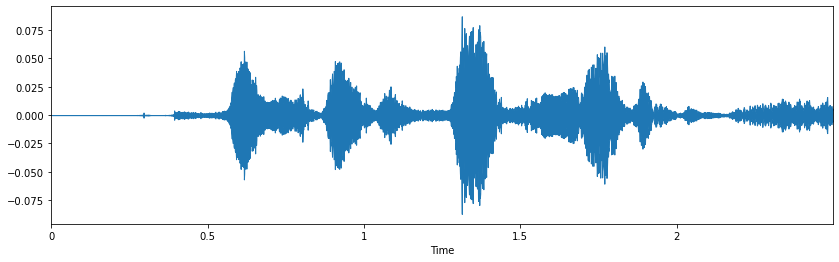

In [37]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Feature Extraction
- Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.


The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

![image.png](https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg)

As stated there with the help of the sample rate and the sample data, one can perform several transformations on it to extract valuable features out of it.
1. Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
2. Energy : The sum of squares of the signal values, normalized by the respective frame length.
3. Entropy of Energy : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
4. Spectral Centroid : The center of gravity of the spectrum.
5. Spectral Spread : The second central moment of the spectrum.
6. Spectral Entropy :  Entropy of the normalized spectral energies for a set of sub-frames.
7. Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
8. Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
9.  MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
10. Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
11. Chroma Deviation : The standard deviation of the 12 chroma coefficients.


In this project i am not going deep in feature selection process to check which features are good for our dataset rather i am only extracting 5 features:
- Zero Crossing Rate
- Chroma_stft
- MFCC
- RMS(root mean square) value
- MelSpectogram to train our model.




In [38]:

hop_length = 512

In [39]:
# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)
#RMS Energy
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
#MFCC
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [40]:

def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result
    


In [41]:

def get_features(path):

    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)
    
    
    noise_data = noise(data)
    res2 = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res2)) 
    
    
    data_pitch = pitch(data, sample_rate)
    res3 = extract_features(data_pitch,sample_rate)
    result = np.vstack((result, res3)) 
    
   
    data_noise_pitch = noise(data_pitch)
    res4 = extract_features(data_noise_pitch,sample_rate)
    result = np.vstack((result, res4)) 
    
    return result

In [42]:

X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)


In [43]:

len(X), len(Y), data_path.Path.shape


(54740, 54740, (13685,))

In [44]:

Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head(20)

0         1         2         3         4         5         6  \
0   0.342285  0.479492  0.573730  0.458008  0.376465  0.301758  0.269043   
1   0.250977  0.373535  0.486328  0.484863  0.471191  0.460449  0.454102   
2   0.303711  0.430176  0.531250  0.461914  0.379883  0.319336  0.280273   
3   0.233887  0.360352  0.483398  0.475586  0.450684  0.419434  0.383789   
4   0.420898  0.631348  0.833008  0.837891  0.831055  0.821777  0.819824   
5   0.248047  0.376465  0.495605  0.487793  0.485352  0.483887  0.483398   
6   0.285645  0.410645  0.544434  0.490723  0.463379  0.437988  0.402832   
7   0.255371  0.377930  0.497559  0.494141  0.488770  0.483398  0.491211   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.049805  0.121094   
9   0.270996  0.387207  0.507812  0.497070  0.478027  0.479492  0.482910   
10  0.000000  0.000000  0.000000  0.145020  0.257324  0.375977  0.506348   
11  0.244629  0.366699  0.495605  0.502441  0.498047  0.506836  0.501953   
12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13  0.252930  0.373535  0.495117  0.493652  0.488281  0.482910  0.490234   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15  0.246582  0.367676  0.487305  0.479004  0.483887  0.490723  0.494141   
16  0.354004  0.478516  0.639648  0.672852  0.707520  0.735840  0.752930   
17  0.250000  0.373535  0.505859  0.495117  0.500000  0.505371  0.499512   
18  0.248535  0.356445  0.491211  0.511719  0.523438  0.524414  0.504395   
19  0.247070  0.370605  0.502441  0.513672  0.500977  0.500000  0.496582   

           7         8         9  ...       2367       2368       2369  \
0   0.256348  0.252441  0.252930  ...  -1.800944  -1.947110  -1.746312   
1   0.435547  0.439453  0.446777  ...   1.686276  -0.234972  -3.530743   
2   0.266113  0.261230  0.261230  ...   1.687637   2.040603   2.416945   
3   0.363770  0.359375  0.350586  ...   1.636577   5.612628   5.030129   
4   0.810059  0.804688  0.627930  ...   2.861256   2.993450   2.379827   
5   0.488281  0.490723  0.486816  ...  -6.639747  -1.557153   1.315904   
6   0.381836  0.391602  0.384766  ...   8.848892   9.139691   7.758842   
7   0.486328  0.492676  0.501953  ...   3.617033   2.552306  -1.056730   
8   0.121094  0.168945  0.277344  ...   5.207092 -24.368179  23.136841   
9   0.488281  0.506348  0.519531  ...  -9.268064  -8.368549   4.974877   
10  0.495117  0.504883  0.506836  ...   1.326581 -24.008339  12.614294   
11  0.510742  0.504395  0.500000  ... -11.529615  -6.851185  -1.615989   
12  0.000000  0.000000  0.000000  ...   0.943145  -0.231550  -1.535729   
13  0.485840  0.485352  0.492188  ...   6.092182   1.385748   0.463621   
14  0.000000  0.087402  0.225586  ...   0.461238   0.366691   0.244801   
15  0.497070  0.497559  0.500488  ...  -4.445624   1.540144   0.002888   
16  0.688965  0.637207  0.684570  ...   3.191881   3.446969   3.624839   
17  0.505859  0.508301  0.503906  ...   0.381923  -3.546996   0.712141   
18  0.468750  0.452637  0.499512  ...   0.546565   0.254148   0.095168   
19  0.492676  0.510254  0.520020  ...  -4.541766  -3.065117   1.996329   

         2370       2371       2372      2373      2374      2375    labels  
0   -1.296943  -0.702259  -0.045278  0.624514  1.286767  1.931510  surprise  
1    3.661467   2.716371   2.535492  1.540029  1.340061  1.915712  surprise  
2    2.743222   2.960053   3.031116  2.948024  2.730061  2.419729  surprise  
3    0.453713  -0.872621   2.631302  4.558650  5.139954  1.096778  surprise  
4    1.030240  -0.787677  -2.658594 -4.171967 -5.034144 -5.102701   neutral  
5   -3.800267  -1.220258   1.198410 -1.599690 -2.300406 -2.233367   neutral  
6    4.971623   1.409157  -2.224360 -5.296460 -7.229548 -7.525167   neutral  
7   -2.653839  -7.472299  -4.836070  2.426512 -0.452354 -4.080909   neutral  
8  -17.047810  -2.212386 -14.705015 -2.622180 -8.794046  2.607786   disgust  
9    0.109021  -9.018438 -12.391562 -7.600380 -2.549937 -0.936592   disgust  
1

#  Data preparation completed

In [45]:
#Features = pd.read_csv('features.csv')
print(Features.shape)

(54740, 2377)


In [46]:
Features = Features.fillna(0)
print(Features.isna().any())
Features.shape

0         False
1         False
2         False
3         False
4         False
          ...  
2372      False
2373      False
2374      False
2375      False
labels    False
Length: 2377, dtype: bool


(54740, 2377)

# Training mode

In [47]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import tqdm

from torch import nn,optim

In [48]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device
#model = ECAPA_TDNN(80)
#model.to(device)

device(type='cuda')

In [49]:
Features['labels'].value_counts()
Features['labels'] = Features['labels'].replace(['disgust', 'sad', 'fear', 'angry', 'happy', 'neutral', 'surprise'], [0,1,2,3,4,5,6])


In [50]:
Features = Features.fillna(0)
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.15, random_state=30, shuffle=True,stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
#x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=30, test_size=0.25, shuffle=True,stratify=y_test)

#scaler = StandardScaler()

#x_train = scaler.fit_transform(x_train)
#x_val = scaler.transform(x_val)
#x_test = scaler.transform(x_test)


#x_train.shape, x_test.shape, x_val.shape, x_train.shape, x_test.shape, x_val.shape

((46529, 2376), (46529,), (8211, 2376), (8211,))

## ECAPA_TDNN

This model is used for voiceprint recognition. Whether the model is suitable for the scenario mainly depends on its ability to represent data.

https://github.com/lawlict/ECAPA-TDNN/blob/master/ecapa_tdnn.py

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F



''' Res2Conv1d + BatchNorm1d + ReLU
'''
class Res2Conv1dReluBn(nn.Module):
    '''
    in_channels == out_channels == channels
    '''
    def __init__(self, channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False, scale=4):
        super().__init__()
        assert channels % scale == 0, "{} % {} != 0".format(channels, scale)
        self.scale = scale
        self.width = channels // scale
        self.nums = scale if scale == 1 else scale - 1

        self.convs = []
        self.bns = []
        for i in range(self.nums):
            self.convs.append(nn.Conv1d(self.width, self.width, kernel_size, stride, padding, dilation, bias=bias))
            self.bns.append(nn.BatchNorm1d(self.width))
        self.convs = nn.ModuleList(self.convs)
        self.bns = nn.ModuleList(self.bns)

    def forward(self, x):
        out = []
        spx = torch.split(x, self.width, 1)
        for i in range(self.nums):
            if i == 0:
                sp = spx[i]
            else:
                sp = sp + spx[i]
            # Order: conv -> relu -> bn
            sp = self.convs[i](sp)
            sp = self.bns[i](F.relu(sp))
            out.append(sp)
        if self.scale != 1:
            out.append(spx[self.nums])
        out = torch.cat(out, dim=1)
        return out



''' Conv1d + BatchNorm1d + ReLU
'''
class Conv1dReluBn(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding, dilation, bias=bias)
        self.bn = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        return self.bn(F.relu(self.conv(x)))



''' The SE connection of 1D case.
'''
class SE_Connect(nn.Module):
    def __init__(self, channels, s=2):
        super().__init__()
        assert channels % s == 0, "{} % {} != 0".format(channels, s)
        self.linear1 = nn.Linear(channels, channels // s)
        self.linear2 = nn.Linear(channels // s, channels)

    def forward(self, x):
        out = x.mean(dim=2)
        out = F.relu(self.linear1(out))
        out = torch.sigmoid(self.linear2(out))
        out = x * out.unsqueeze(2)
        return out



''' SE-Res2Block.
    Note: residual connection is implemented in the ECAPA_TDNN model, not here.
'''
def SE_Res2Block(channels, kernel_size, stride, padding, dilation, scale):
    return nn.Sequential(
        Conv1dReluBn(channels, channels, kernel_size=1, stride=1, padding=0),
        Res2Conv1dReluBn(channels, kernel_size, stride, padding, dilation, scale=scale),
        Conv1dReluBn(channels, channels, kernel_size=1, stride=1, padding=0),
        SE_Connect(channels)
    )



''' Attentive weighted mean and standard deviation pooling.
'''
class AttentiveStatsPool(nn.Module):
    def __init__(self, in_dim, bottleneck_dim):
        super().__init__()
        # Use Conv1d with stride == 1 rather than Linear, then we don't need to transpose inputs.
        self.linear1 = nn.Conv1d(in_dim, bottleneck_dim, kernel_size=1) # equals W and b in the paper
        self.linear2 = nn.Conv1d(bottleneck_dim, in_dim, kernel_size=1) # equals V and k in the paper

    def forward(self, x):
        # DON'T use ReLU here! In experiments, I find ReLU hard to converge.
        alpha = torch.tanh(self.linear1(x))
        alpha = torch.softmax(self.linear2(alpha), dim=2)
        mean = torch.sum(alpha * x, dim=2)
        residuals = torch.sum(alpha * x ** 2, dim=2) - mean ** 2
        std = torch.sqrt(residuals.clamp(min=1e-9))
        return torch.cat([mean, std], dim=1)



''' Implementation of
    "ECAPA-TDNN: Emphasized Channel Attention, Propagation and Aggregation in TDNN Based Speaker Verification".
    Note that we DON'T concatenate the last frame-wise layer with non-weighted mean and standard deviation, 
    because it brings little improvment but significantly increases model parameters. 
    As a result, this implementation basically equals the A.2 of Table 2 in the paper.
'''
class ECAPA_TDNN(nn.Module):
    def __init__(self, in_channels=80, channels=512, embd_dim=192):
        super().__init__()
        self.layer1 = Conv1dReluBn(in_channels, channels, kernel_size=5, padding=2)
        self.layer2 = SE_Res2Block(channels, kernel_size=3, stride=1, padding=2, dilation=2, scale=8)
        self.layer3 = SE_Res2Block(channels, kernel_size=3, stride=1, padding=3, dilation=3, scale=8)
        self.layer4 = SE_Res2Block(channels, kernel_size=3, stride=1, padding=4, dilation=4, scale=8)

        cat_channels = channels * 3
        self.conv = nn.Conv1d(cat_channels, 1536, kernel_size=1)
        self.pooling = AttentiveStatsPool(1536, 128)
        self.bn1 = nn.BatchNorm1d(3072)
        self.linear = nn.Linear(3072, embd_dim)
        self.bn2 = nn.BatchNorm1d(embd_dim)

    def forward(self, x):
        x = x.transpose(1, 2)
        out1 = self.layer1(x)
        out2 = self.layer2(out1) + out1
        out3 = self.layer3(out1 + out2) + out1 + out2
        out4 = self.layer4(out1 + out2 + out3) + out1 + out2 + out3

        out = torch.cat([out2, out3, out4], dim=1)
        out = F.relu(self.conv(out))
        out = self.bn1(self.pooling(out))
        out = self.bn2(self.linear(out))
        return out
      


if __name__ == '__main__':
    # Input size: batch_size * seq_len * feat_dim
    x = torch.zeros(2, 200, 80)
    model = ECAPA_TDNN(in_channels=80, channels=512, embd_dim=192)
    out = model(x)
    print(model)
    print(out.shape)    # should be [2, 192]

ECAPA_TDNN(
  (layer1): Conv1dReluBn(
    (conv): Conv1d(80, 512, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
    (bn): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Conv1dReluBn(
      (conv): Conv1d(512, 512, kernel_size=(1,), stride=(1,), bias=False)
      (bn): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Res2Conv1dReluBn(
      (convs): ModuleList(
        (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,), bias=False)
        (1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,), bias=False)
        (2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,), bias=False)
        (3): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,), bias=False)
        (4): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,), bias=False)
        

In [52]:

num_epochs  = 100
batch_size = 512
model = ECAPA_TDNN(in_channels = 2376)
model.to('cuda')


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())


x_train = torch.tensor(x_train, dtype=torch.float32).cuda()
y_train = torch.tensor(y_train, dtype=torch.long).cuda()
x_test = torch.tensor(x_test, dtype=torch.float32).cuda()
y_test = torch.tensor(y_test, dtype=torch.long).cuda()


train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train.unsqueeze(1), y_train), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test.unsqueeze(1), y_test), batch_size=batch_size, shuffle=False)

In [53]:
#num_epochs = 20


for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch+1, running_loss/len(train_loader)))


Epoch 1 loss: 4.361
Epoch 2 loss: 3.667
Epoch 3 loss: 3.204
Epoch 4 loss: 2.802
Epoch 5 loss: 2.462
Epoch 6 loss: 2.178
Epoch 7 loss: 1.912
Epoch 8 loss: 1.671
Epoch 9 loss: 1.466
Epoch 10 loss: 1.285
Epoch 11 loss: 1.138
Epoch 12 loss: 1.003
Epoch 13 loss: 0.894
Epoch 14 loss: 0.802
Epoch 15 loss: 0.699
Epoch 16 loss: 0.646
Epoch 17 loss: 0.570
Epoch 18 loss: 0.505
Epoch 19 loss: 0.453
Epoch 20 loss: 0.422
Epoch 21 loss: 0.388
Epoch 22 loss: 0.341
Epoch 23 loss: 0.304
Epoch 24 loss: 0.271
Epoch 25 loss: 0.259
Epoch 26 loss: 0.257
Epoch 27 loss: 0.214
Epoch 28 loss: 0.196
Epoch 29 loss: 0.182
Epoch 30 loss: 0.165
Epoch 31 loss: 0.159
Epoch 32 loss: 0.139
Epoch 33 loss: 0.162
Epoch 34 loss: 0.156
Epoch 35 loss: 0.125
Epoch 36 loss: 0.129
Epoch 37 loss: 0.131
Epoch 38 loss: 0.119
Epoch 39 loss: 0.125
Epoch 40 loss: 0.096
Epoch 41 loss: 0.091
Epoch 42 loss: 0.081
Epoch 43 loss: 0.084
Epoch 44 loss: 0.072
Epoch 45 loss: 0.065
Epoch 46 loss: 0.079
Epoch 47 loss: 0.078
Epoch 48 loss: 0.074
E

In [54]:
torch.save(model.state_dict(), 'ECAPA_TDNN_audio_model.pth')

In [55]:

correct = 0
total = 0
pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pred.extend(predicted.cpu().numpy())
print('Test accuracy: %.2f%%' % (100 * correct / total))



Test accuracy: 96.53%


In [56]:
print(classification_report(y_test.cpu(), pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1232
           1       0.96      0.96      0.96      1350
           2       0.97      0.95      0.96      1246
           3       0.97      0.98      0.97      1340
           4       0.96      0.96      0.96      1307
           5       0.98      0.97      0.97      1295
           6       0.98      0.97      0.97       441

    accuracy                           0.97      8211
   macro avg       0.97      0.97      0.97      8211
weighted avg       0.97      0.97      0.97      8211



keras-Pytorch

In [57]:
x_train.shape, y_train.shape

(torch.Size([46529, 2376]), torch.Size([46529]))

In [58]:
import torch
import torch.nn as nn

class AudioModel(nn.Module):
    def __init__(self, input_shape, num_classes):
        super(AudioModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 256, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.conv2 = nn.Conv1d(256, 256, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(256)
        self.pool2 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv1d(256, 128, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.dropout1 = nn.Dropout(0.2)
        self.conv4 = nn.Conv1d(128, 64, kernel_size=5, stride=1, padding=2)
        self.bn3 = nn.BatchNorm1d(64)
        self.pool4 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(9536, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.pool3(x)
        x = self.dropout1(x)
        x = self.conv4(x)
        x = self.bn3(x)
        x = nn.functional.relu(x)
        x = self.pool4(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.bn4(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


input_shape = (2376,)
num_classes = 7
num_epochs  = 80
batch_size = 256
model = AudioModel(input_shape, num_classes)
model.to('cuda')


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())


x_train = torch.tensor(x_train, dtype=torch.float32).cuda()
y_train = torch.tensor(y_train, dtype=torch.long).cuda()
x_test = torch.tensor(x_test, dtype=torch.float32).cuda()
y_test = torch.tensor(y_test, dtype=torch.long).cuda()


train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train.unsqueeze(1), y_train), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test.unsqueeze(1), y_test), batch_size=batch_size, shuffle=False)



In [59]:
print(model)

AudioModel(
  (conv1): Conv1d(1, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool1): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv2): Conv1d(256, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv3): Conv1d(256, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv4): Conv1d(128, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (flatten): Flatten()
  (fc1): Linear(in_

In [60]:
# num_epochs = 20

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch+1, running_loss/len(train_loader)))


Epoch 1 loss: 1.462
Epoch 2 loss: 1.220
Epoch 3 loss: 1.105
Epoch 4 loss: 1.010
Epoch 5 loss: 0.929
Epoch 6 loss: 0.861
Epoch 7 loss: 0.788
Epoch 8 loss: 0.718
Epoch 9 loss: 0.651
Epoch 10 loss: 0.595
Epoch 11 loss: 0.541
Epoch 12 loss: 0.484
Epoch 13 loss: 0.447
Epoch 14 loss: 0.407
Epoch 15 loss: 0.367
Epoch 16 loss: 0.339
Epoch 17 loss: 0.314
Epoch 18 loss: 0.284
Epoch 19 loss: 0.260
Epoch 20 loss: 0.243
Epoch 21 loss: 0.225
Epoch 22 loss: 0.212
Epoch 23 loss: 0.202
Epoch 24 loss: 0.184
Epoch 25 loss: 0.180
Epoch 26 loss: 0.171
Epoch 27 loss: 0.163
Epoch 28 loss: 0.153
Epoch 29 loss: 0.143
Epoch 30 loss: 0.144
Epoch 31 loss: 0.138
Epoch 32 loss: 0.129
Epoch 33 loss: 0.124
Epoch 34 loss: 0.122
Epoch 35 loss: 0.121
Epoch 36 loss: 0.113
Epoch 37 loss: 0.112
Epoch 38 loss: 0.100
Epoch 39 loss: 0.103
Epoch 40 loss: 0.101
Epoch 41 loss: 0.103
Epoch 42 loss: 0.100
Epoch 43 loss: 0.092
Epoch 44 loss: 0.090
Epoch 45 loss: 0.094
Epoch 46 loss: 0.089
Epoch 47 loss: 0.087
Epoch 48 loss: 0.085
E

In [61]:
torch.save(model.state_dict(), 'audio_model.pth')

In [62]:

model = AudioModel(input_shape, num_classes)
model.load_state_dict(torch.load('audio_model.pth'))
model.to('cuda')

AudioModel(
  (conv1): Conv1d(1, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool1): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv2): Conv1d(256, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv3): Conv1d(256, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv4): Conv1d(128, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (flatten): Flatten()
  (fc1): Linear(in_

In [63]:

correct = 0
total = 0
pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pred.extend(predicted.cpu().numpy())
print('Test accuracy: %.2f%%' % (100 * correct / total))

Test accuracy: 94.56%


In [64]:
print(classification_report(y_test.cpu(), pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1232
           1       0.95      0.94      0.94      1350
           2       0.93      0.94      0.94      1246
           3       0.96      0.96      0.96      1340
           4       0.95      0.92      0.94      1307
           5       0.95      0.95      0.95      1295
           6       0.96      0.97      0.96       441

    accuracy                           0.95      8211
   macro avg       0.95      0.95      0.95      8211
weighted avg       0.95      0.95      0.95      8211



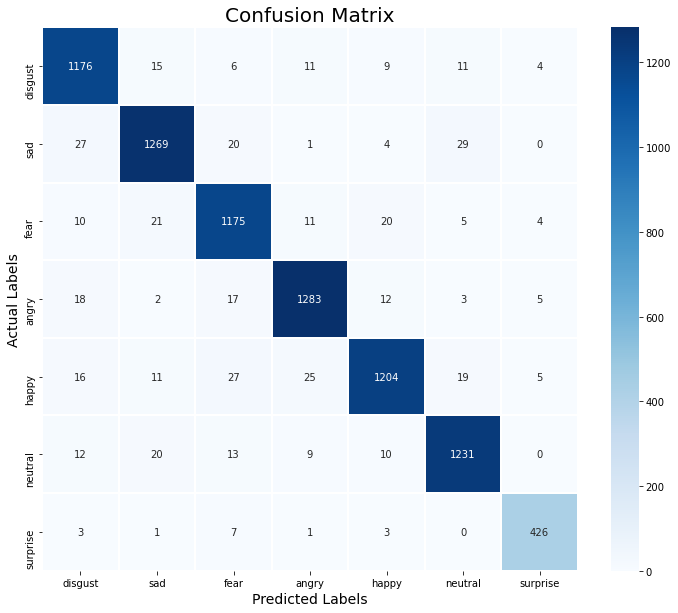

In [65]:

# Features['labels'] = Features['labels'].replace(['disgust', 'sad', 'fear', 'angry', 'happy', 'neutral', 'surprise'], [0,1,2,3,4,5,6])
cm = confusion_matrix(y_test.cpu(), pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in ['disgust', 'sad', 'fear', 'angry', 'happy', 'neutral', 'surprise']] , columns = [i for i in ['disgust', 'sad', 'fear', 'angry', 'happy', 'neutral', 'surprise']])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()